In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statistics as statistics

In [2]:
insurance_data = pd.read_csv("insurance.txt", delimiter=',')

In [3]:
insurance_data

,age,bmi,children,charges
0,19,27.900,0,16884.92400
1,18,33.770,1,1725.55230
2,28,33.000,3,4449.46200
3,33,22.705,0,21984.47061
4,32,28.880,0,3866.85520
...,...,...,...,...
1333,50,30.970,3,10600.54830
1334,18,31.920,0,2205.98080
1335,18,36.850,0,1629.83350
1336,21,25.800,0,2007.94500


In [4]:
norm_insu_data = ((insurance_data-insurance_data.mean())/(insurance_data.std()))
norm_insu_data.insert(0, 'x0', 1) #x0 is appeneded to allow for the zeroth order term

In [5]:
#normalised data frame

norm_insu_data

,x0,age,bmi,children,charges
0,1,-1.438227,-0.453151,-0.908274,0.298472
1,1,-1.509401,0.509431,-0.078738,-0.953333
2,1,-0.797655,0.383164,1.580335,-0.728402
3,1,-0.441782,-1.305043,-0.908274,0.719574
4,1,-0.512957,-0.292447,-0.908274,-0.776512
...,...,...,...,...,...
1333,1,0.768185,0.050278,1.580335,-0.220468
1334,1,-1.509401,0.206062,-0.908274,-0.913661
1335,1,-1.509401,1.014499,-0.908274,-0.961237
1336,1,-1.295877,-0.797515,-0.908274,-0.930014


In [6]:
#creating a list of 20 data_frames that have been shuffled

dataset_list=list()
dataset_list.append(norm_insu_data.sample(frac=1))
for i in range(1,20):
    dataset_list.append(dataset_list[-1].sample(frac=1))


In [7]:
# Splitting the datasets into testing and training

training_data_list = [None]*20
testing_data_list = [None]*20

for i in range(20):
    training_data_list[i] = dataset_list[i].sample(frac=0.7)
    testing_data_list[i] = dataset_list[i].drop(training_data_list[i].index)

In [8]:
# Normal equation method to find regression model

indep_attrs = ["x0", "age", "bmi", "children"]
dep_attr = ["charges"]

testing_err_norm = []
training_err_norm = []
final_theta_ne=[]
for i in range(20):
    
    #Calculating the weights
    X_train = training_data_list[i][indep_attrs].to_numpy() 
    Y_train = training_data_list[i][dep_attr].to_numpy()
    XT_train = X_train.transpose()

    X_test = testing_data_list[i][indep_attrs].to_numpy() 
    Y_test = testing_data_list[i][dep_attr].to_numpy()
    theta = np.matmul(np.linalg.inv(np.matmul(XT_train,X_train)),np.matmul(XT_train,Y_train))
    final_theta_ne.append(theta)
    
    #Calculating RMSE for training data
    diff_train = np.subtract(np.matmul(X_train, theta), Y_train)
    diffT_train = diff_train.transpose()
    sumsq_train = np.matmul(diffT_train, diff_train)[0][0]
    rmse_train = np.sqrt(sumsq_train/(Y_train.shape[0]))
    training_err_norm.append(rmse_train)
    
    #Calculating RMSE for testing data

    diff_test = np.subtract(np.matmul(X_test, theta), Y_test)
    diffT_test = diff_test.transpose()
    sumsq_test = np.matmul(diffT_test, diff_test)[0][0]
    rmse_test = np.sqrt(sumsq_test/(Y_test.shape[0]))
    testing_err_norm.append(rmse_test)

In [9]:
#final theta after applying NE
bias_ne=[]
bias_ne.append("Bias")
age_ne=[]
age_ne.append("Age")
bmi_ne=[]
bmi_ne.append("BMI")
children_ne=[]
children_ne.append("Children")
print("FINAL THETA OF 20 MODELS AFTER APPLYING NE:-")    
for x in range(20): 
            bias_ne.append(final_theta_ne[x][0]) 
            age_ne.append(final_theta_ne[x][1])
            bmi_ne.append(final_theta_ne[x][2]) 
            children_ne.append(final_theta_ne[x][3])
            
    
for c1, c2, c3, c4 in zip(bias_ne, age_ne, bmi_ne, children_ne):
        print ("%-20s %-20s %-20s %s" % (c1, c2, c3, c4))    

FINAL THETA OF 20 MODELS AFTER APPLYING NE:-
Bias                 Age                  BMI                  Children
[-0.0132888]         [0.30739617]         [0.12473518]         [0.04125595]
[-0.00269798]        [0.27654591]         [0.15586791]         [0.06997091]
[0.01938224]         [0.3012391]          [0.17165635]         [0.06419942]
[-0.00613283]        [0.28651168]         [0.20696898]         [0.05625109]
[-0.00283384]        [0.27194476]         [0.16909337]         [0.04993977]
[0.01168392]         [0.27116155]         [0.18712286]         [0.05777049]
[0.01200911]         [0.28889775]         [0.16066601]         [0.05195943]
[-0.01940875]        [0.2728287]          [0.15726463]         [0.06954576]
[0.03303466]         [0.26846658]         [0.17505215]         [0.06502343]
[-0.00893104]        [0.27490229]         [0.17081179]         [0.08667669]
[-0.00804335]        [0.29964372]         [0.14334662]         [0.04574364]
[-0.00253423]        [0.32766336]         [0.15

In [10]:
#GRADIENT DESCENT FUNCTION DEFINITION
def gradient_descent(x, y, iterations, eta, x_test, y_test, precis):
    
    theta = np.random.rand(x.shape[1],1)
    m = y.shape[0]
    n = y_test.shape[0]
    past_costs_train = []
    past_costs_test= []
    past_rmse_train= []
    past_rmse_test= []
    for i in range(iterations):
        
        prediction_train = np.dot(x, theta)
        error_train = prediction_train - y
        cost_train = 1/(2*m) * np.dot(error_train.T, error_train)
        past_costs_train.append(cost_train[0][0])
        rmse_train = np.sqrt((2*(cost_train[0][0])))
        past_rmse_train.append(rmse_train)
        theta = theta - (eta * (1/m) * np.dot(x.T, error_train))
        
        prediction_test = np.dot(x_test, theta)
        error_test = prediction_test - y_test
        cost_test = 1/(2*n) * np.dot(error_test.T, error_test)
        past_costs_test.append(cost_test[0][0])
        rmse_test = np.sqrt((2*cost_test[0][0]))
        past_rmse_test.append(rmse_test)
        
        if((len(past_costs_train) > 1) and abs(past_costs_train[-2]-past_costs_train[-1]) <= precis):
            break
            
    return theta, past_costs_train, past_costs_test, past_rmse_train, past_rmse_test


In [11]:
# GRADIENT DESCENT IMPLEMENTATION ON 20 MODELS
past_rmse_train_grad_desc = [None]*20
past_rmse_test_grad_desc = [None]*20
past_costs_train_gd = [None]*20
past_costs_test_gd = [None]*20
final_theta_gd = [None]*20
precision = 0.000001
eta = 0.001
iterations = 5000
for i in range(20):
    
    X_train = training_data_list[i][indep_attrs].to_numpy() 
    Y_train = training_data_list[i][dep_attr].to_numpy()
    
    X_test = testing_data_list[i][indep_attrs].to_numpy() 
    Y_test = testing_data_list[i][dep_attr].to_numpy()
    
    final_theta_gd[i], past_costs_train_gd[i], past_costs_test_gd[i], past_rmse_train_grad_desc[i], past_rmse_test_grad_desc[i] = gradient_descent(X_train, Y_train, iterations, eta, X_test, Y_test, precision)
    
    #printing error values for learning rate=0.01 , 20 models.
    training_gd=[]
    training_gd.append("Training")
    testing_gd=[]
    testing_gd.append("Testing")
    
    print ("Error values (every 500th iteration) for model number",i+1,":-\n")
    for x in range(len(past_rmse_train_grad_desc[i])): 
        if x%500==0:
            training_gd.append(past_rmse_train_grad_desc[i][x]) 
            testing_gd.append(past_rmse_test_grad_desc[i][x])
    
    for c1, c2 in zip(training_gd, testing_gd):
        print ("%-40s %s" % (c1, c2))         
    print("\n")

Error values (every 500th iteration) for model number 1 :-

Training                                 Testing
1.3111597560481505                       1.3937873764577138
1.0645847904342225                       1.1472860076780707
0.9638865617332952                       1.0533792591178566
0.9261102407849873                       1.0221448620193876
0.9125008929289673                       1.0132625280766518
0.9076687734056199                       1.0115566044044124
0.9059586392168373                       1.0118497382526335


Error values (every 500th iteration) for model number 2 :-

Training                                 Testing
1.3974026429998947                       1.3201401676404168
1.121158825572783                        1.0749019494492782
1.0095309129551215                       0.97692527163016
0.9680920146137242                       0.9407646422436273
0.9532815045946533                       0.9278538757188071
0.9480448299360806                       0.923273239632655
0.9

Error values (every 500th iteration) for model number 18 :-

Training                                 Testing
1.2984625136923822                       1.2418225631585498
1.0822100587262353                       1.0476522206658734
0.9945252024187432                       0.9713272891544524
0.9612979067466428                       0.9433368770428741
0.9490488406327376                       0.9333907076634974
0.9445601138424646                       0.9299031473408113
0.9429103665785183                       0.9286882537162056


Error values (every 500th iteration) for model number 19 :-

Training                                 Testing
1.3778025685948274                       1.3363392167114327
1.1062037004576688                       1.0789452585280623
1.0012502120331637                       0.9785672608482793
0.9641804586746182                       0.9423382871768758
0.9515869633008317                       0.929533153728525
0.9473551509380094                       0.924927328120571


In [12]:
#final theta after applying GD
bias_gd=[]
bias_gd.append("Bias")
age_gd=[]
age_gd.append("Age")
bmi_gd=[]
bmi_gd.append("BMI")
children_gd=[]
children_gd.append("Children")
print("FINAL THETA OF 20 MODELS AFTER APPLYING GD:-")    
for x in range(20): 
            bias_gd.append(final_theta_gd[x][0]) 
            age_gd.append(final_theta_gd[x][1])
            bmi_gd.append(final_theta_gd[x][2]) 
            children_gd.append(final_theta_gd[x][3])
            
    
for c1, c2, c3, c4 in zip(bias_gd, age_gd, bmi_gd, children_gd):
        print ("%-20s %-20s %-20s %s" % (c1, c2, c3, c4))         


FINAL THETA OF 20 MODELS AFTER APPLYING GD:-
Bias                 Age                  BMI                  Children
[0.00276695]         [0.32092162]         [0.14618007]         [0.04756257]
[0.02010911]         [0.27096468]         [0.17010451]         [0.08418847]
[0.0189395]          [0.30571832]         [0.16954005]         [0.09585259]
[0.00356443]         [0.27552289]         [0.23438756]         [0.06797618]
[0.02543352]         [0.26699249]         [0.16753892]         [0.06312595]
[0.03683105]         [0.28032472]         [0.2012725]          [0.05368453]
[0.02850524]         [0.29212509]         [0.18302292]         [0.06127895]
[-0.00821456]        [0.29073569]         [0.17603022]         [0.06203751]
[0.05484862]         [0.25961267]         [0.18474961]         [0.08526081]
[0.00747863]         [0.25809206]         [0.19450014]         [0.09389699]
[0.01458794]         [0.30537989]         [0.15354479]         [0.06330397]
[0.01583456]         [0.33507349]         [0.15

Model number  1 :


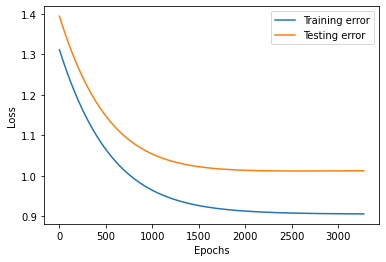

Model number  2 :


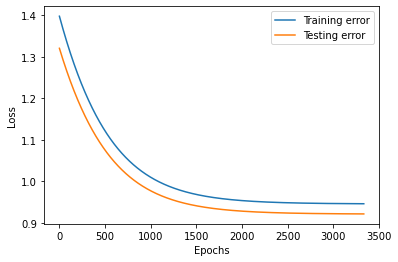

Model number  3 :


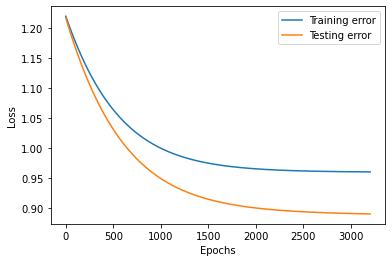

Model number  4 :


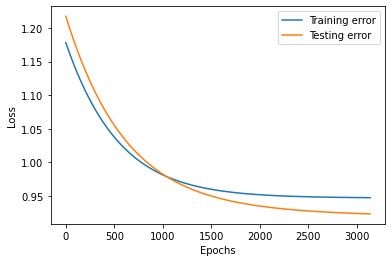

Model number  5 :


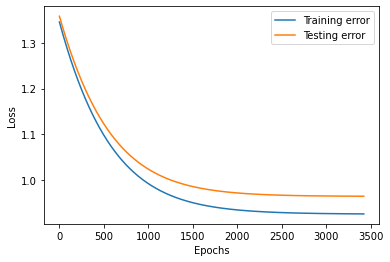

Model number  6 :


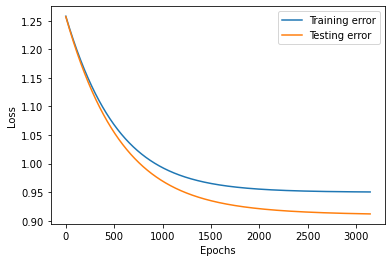

Model number  7 :


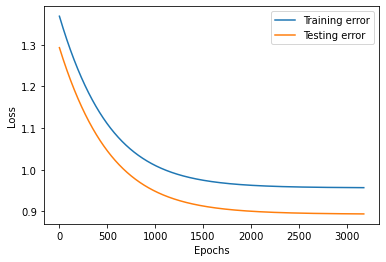

Model number  8 :


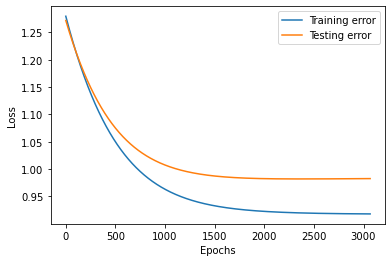

Model number  9 :


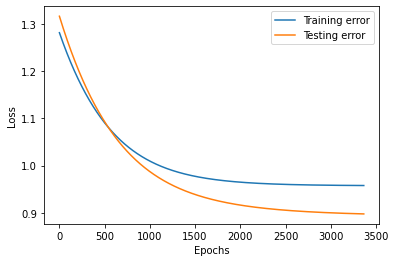

Model number  10 :


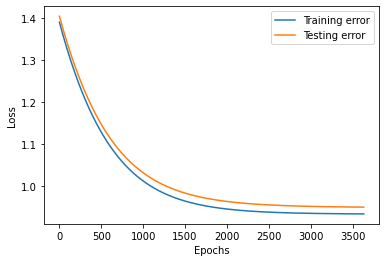

Model number  11 :


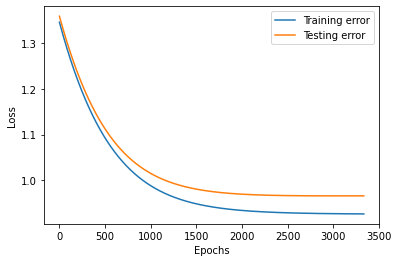

Model number  12 :


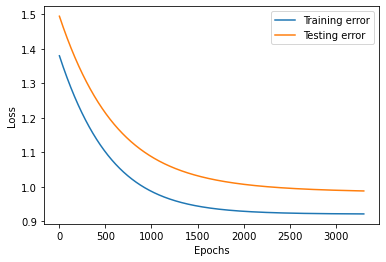

Model number  13 :


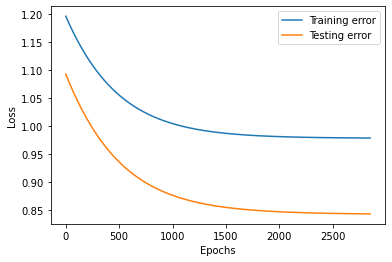

Model number  14 :


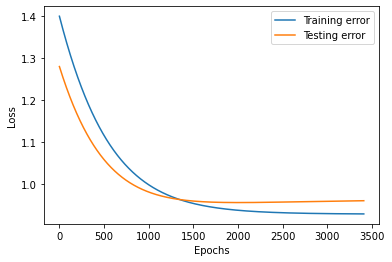

Model number  15 :


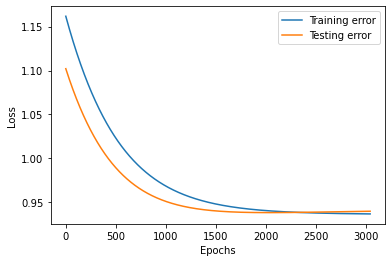

Model number  16 :


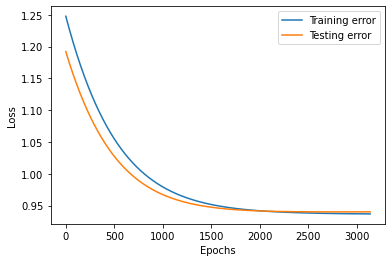

Model number  17 :


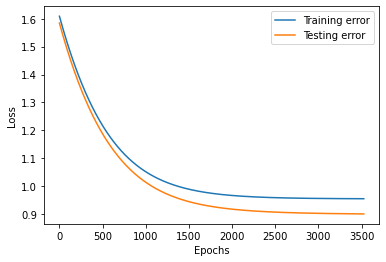

Model number  18 :


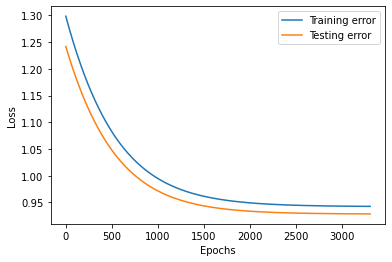

Model number  19 :


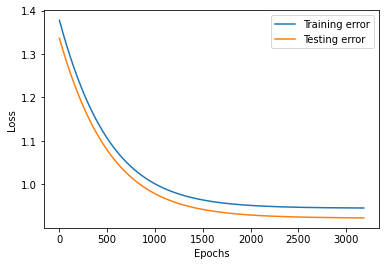

Model number  20 :


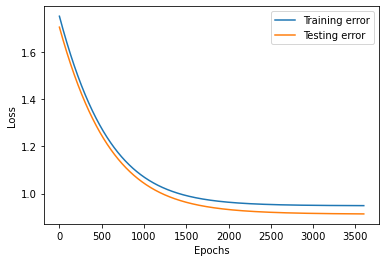

In [13]:
# Plotting training VS testing error for all 20 models for GD
for x in range(20):
    plt.figure()
    print("Model number ",x+1,":")
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.plot(past_rmse_train_grad_desc[x], label="Training error")
    plt.plot(past_rmse_test_grad_desc[x], label="Testing error")
    plt.legend()
    plt.show()

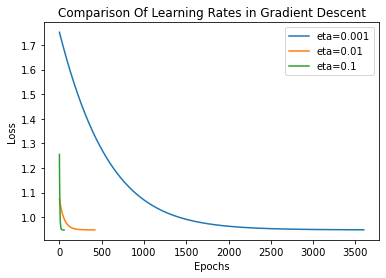

In [14]:
#Now using 20th model to compare effect of learning rate on GD

X_train = training_data_list[19][indep_attrs].to_numpy() 
Y_train = training_data_list[19][dep_attr].to_numpy()
    
X_test = testing_data_list[19][indep_attrs].to_numpy() 
Y_test = testing_data_list[19][dep_attr].to_numpy()

precision = 0.000001
eta2=0.01
eta3=0.1

final_theta2_gd, past_costs_train2, past_costs_test2, past_rmse_train_grad_desc2, past_rmse_test_grad_desc3 = gradient_descent(X_train, Y_train, iterations, eta2, X_test, Y_test, precision)
final_theta3_gd, past_costs_train3, past_costs_test3, past_rmse_train_grad_desc3, past_rmse_test_grad_desc3 = gradient_descent(X_train, Y_train, iterations, eta3, X_test, Y_test, precision)

plt.figure()
plt.title('Comparison Of Learning Rates in Gradient Descent')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.plot(past_rmse_train_grad_desc[19], label='eta=0.001')
plt.plot(past_rmse_train_grad_desc2, label='eta=0.01')
plt.plot(past_rmse_train_grad_desc3, label='eta=0.1')
plt.legend()

In [15]:
# STOCHASTIC GRADIENT DESCENT FUNCTION DEFINITION

def stoch_grad(x, y, iterations, eta, x_test, y_test, precis):
    theta = np.random.rand(x.shape[1],1)
    m = y.shape[0]
    n = y_test.shape[0]
    past_costs_train = []
    past_costs_test= []
    past_rmse_train= []
    past_rmse_test= []
    for i in range(iterations):
        p = np.random.permutation(len(x))
        x=x[p] 
        y=y[p]
        mse = 0
        for j in range(x.shape[0]):
            row_j = np.matrix(x[j])
            prediction = np.matmul(row_j, theta)
            xT = row_j.transpose()
            diff = prediction - np.matrix(y[j])
            theta = theta - eta*np.matmul(xT, diff)
        
        diff_train = np.matmul(x, theta)-y
        cost_train = (1/(2*m))*(np.matmul(diff_train.T, diff_train))
        cost_train_val = np.array(cost_train)[0][0]
        past_costs_train.append(cost_train_val)
        past_rmse_train.append(np.sqrt(2*cost_train_val))
        
        diff_test = np.matmul(x_test,theta) - y_test
        mse_test = (1/(2*n))*(np.matmul(diff_test.T, diff_test))
        mse_test_val = np.array(mse_test)[0][0]
        past_costs_test.append(mse_test_val)
        past_rmse_test.append(np.sqrt(2*mse_test_val))
        if((len(past_costs_train) > 1) and abs(past_costs_train[-2]-past_costs_train[-1]) <= precis):
            break
    return theta, past_costs_train, past_costs_test, past_rmse_train, past_rmse_test   

            

In [16]:
# STOCHASTIC GRADIENT DESCENT IMPLEMENTATION ON 20 MODELS
past_rmse_train_sgd = [None]*20
past_rmse_test_sgd = [None]*20
past_costs_train_sgd = [None]*20
past_costs_test_sgd = [None]*20
final_theta_sgd = [None]*20
precision = 0.000001
eta = 0.001
iterations = 400
for i in range(20):
    
    X_train = training_data_list[i][indep_attrs].to_numpy() 
    Y_train = training_data_list[i][dep_attr].to_numpy()
    
    X_test = testing_data_list[i][indep_attrs].to_numpy() 
    Y_test = testing_data_list[i][dep_attr].to_numpy()
    
    final_theta_sgd[i], past_costs_train_sgd[i], past_costs_test_sgd[i], past_rmse_train_sgd[i], past_rmse_test_sgd[i] = stoch_grad(X_train, Y_train, iterations, eta, X_test, Y_test, precision)
    
    #printing error values for learning rate=0.01 , 20 models.
    #printing error values for learning rate=0.01 , 20 models.
    training_sgd=[]
    training_sgd.append("Training")
    testing_sgd=[]
    testing_sgd.append("Testing")
    
    print ("Error values (every 25th iteration) for model number",i+1,":-\n")
    for x in range(len(past_rmse_train_sgd[i])): 
        if x%25==0:
            training_sgd.append(past_rmse_train_sgd[i][x]) 
            testing_sgd.append(past_rmse_test_sgd[i][x])
    
    for c1, c2 in zip(training_sgd, testing_sgd):
        print ("%-40s %s" % (c1, c2))         
    print("\n")


Error values (every 25th iteration) for model number 1 :-

Training                                 Testing
1.018659229759684                        1.0884966531560774


Error values (every 25th iteration) for model number 2 :-

Training                                 Testing
0.9971844289835622                       0.9879469966372763
0.9451993910625471                       0.9205957739878982
0.9452037847624709                       0.921028065934273


Error values (every 25th iteration) for model number 3 :-

Training                                 Testing
1.0118076726269993                       0.9755168288694698
0.9593096364975532                       0.8890123815618637
0.9592376329401439                       0.8885584851405308


Error values (every 25th iteration) for model number 4 :-

Training                                 Testing
1.032654522730248                        1.0164829652222442
0.9468730270445077                       0.919280746157232


Error values (every 25

In [17]:
#final theta after applying SGD
bias_sgd=[]
bias_sgd.append("Bias")
age_sgd=[]
age_sgd.append("Age")
bmi_sgd=[]
bmi_sgd.append("BMI")
children_sgd=[]
children_sgd.append("Children")
print("FINAL THETA OF 20 MODELS AFTER APPLYING SGD:-")    
for x in range(20): 
            bias_sgd.append(final_theta_sgd[x][0]) 
            age_sgd.append(final_theta_sgd[x][1])
            bmi_sgd.append(final_theta_sgd[x][2]) 
            children_sgd.append(final_theta_sgd[x][3])
            
    
for c1, c2, c3, c4 in zip(bias_sgd, age_sgd, bmi_sgd, children_sgd):
        print ("%-20s %-20s %-20s %s" % (c1, c2, c3, c4))    

FINAL THETA OF 20 MODELS AFTER APPLYING SGD:-
Bias                 Age                  BMI                  Children
[[-0.01332605]]      [[0.30470699]]       [[0.12227047]]       [[0.04589778]]
[[-0.00938303]]      [[0.28361001]]       [[0.15404471]]       [[0.07730803]]
[[0.02037884]]       [[0.29926383]]       [[0.16367302]]       [[0.06933666]]
[[-0.00793398]]      [[0.29092933]]       [[0.199594]]         [[0.05596403]]
[[0.00060437]]       [[0.27085412]]       [[0.1646961]]        [[0.05579102]]
[[0.0070069]]        [[0.2725881]]        [[0.18486894]]       [[0.05781585]]
[[0.01536049]]       [[0.28785081]]       [[0.16016674]]       [[0.04652448]]
[[-0.02643596]]      [[0.26939448]]       [[0.14803594]]       [[0.07212523]]
[[0.02333949]]       [[0.26718673]]       [[0.16772312]]       [[0.067591]]
[[-0.00804827]]      [[0.27684255]]       [[0.16915695]]       [[0.08334169]]
[[-0.01994089]]      [[0.29950488]]       [[0.13645983]]       [[0.04186214]]
[[-0.00161758]]      [[0.3

Model number  1 :


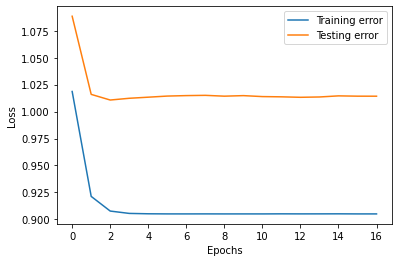

Model number  2 :


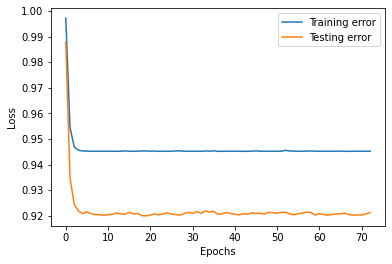

Model number  3 :


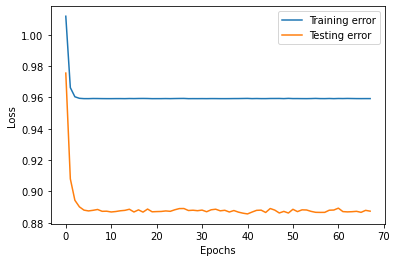

Model number  4 :


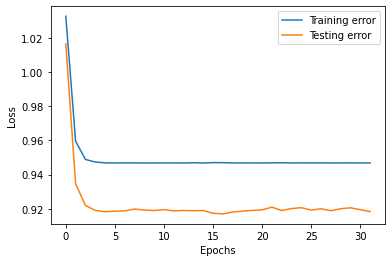

Model number  5 :


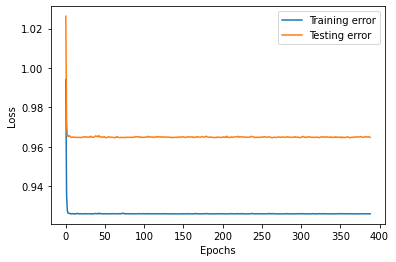

Model number  6 :


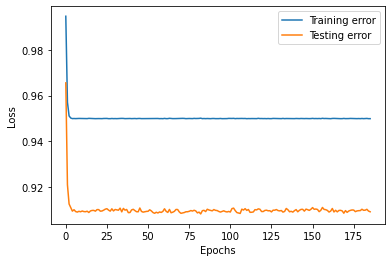

Model number  7 :


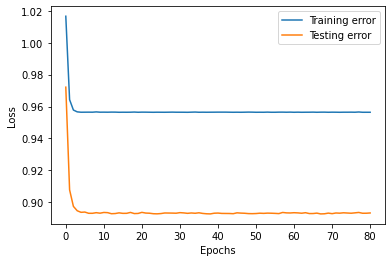

Model number  8 :


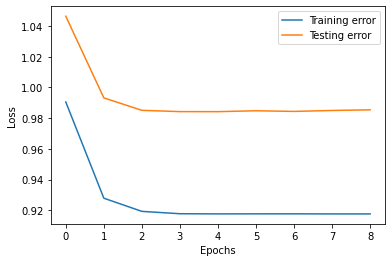

Model number  9 :


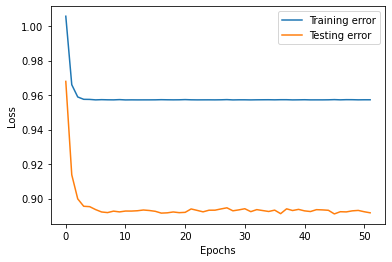

Model number  10 :


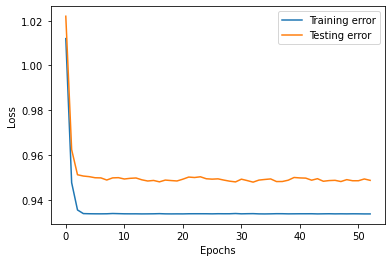

Model number  11 :


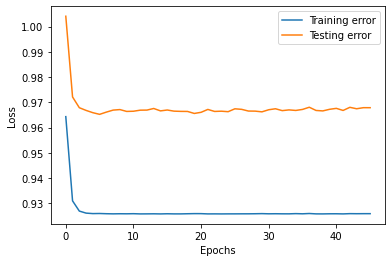

Model number  12 :


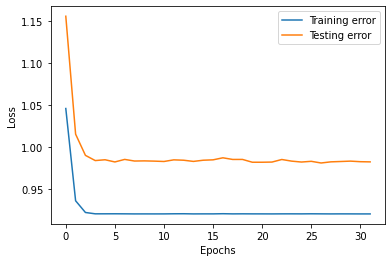

Model number  13 :


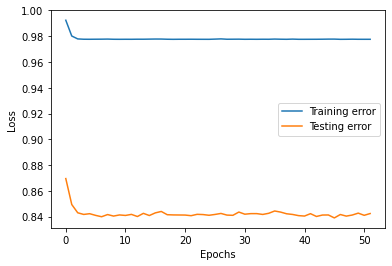

Model number  14 :


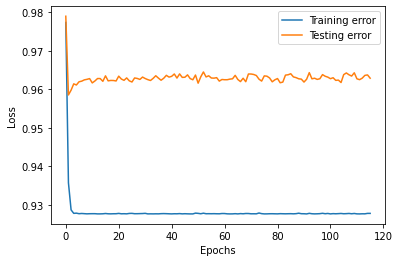

Model number  15 :


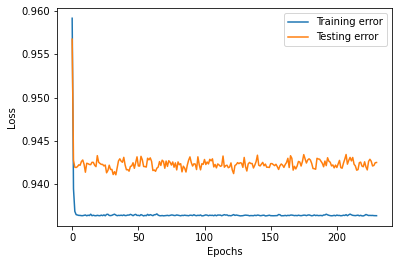

Model number  16 :


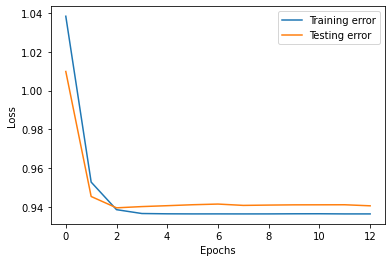

Model number  17 :


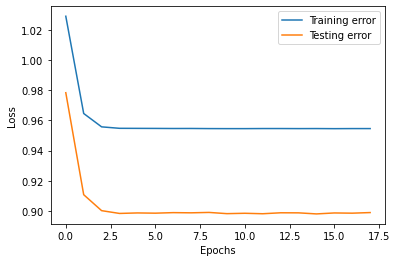

Model number  18 :


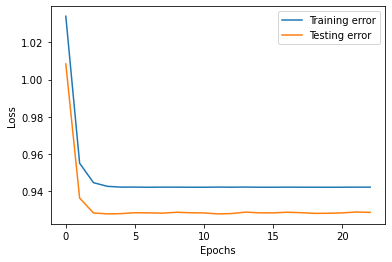

Model number  19 :


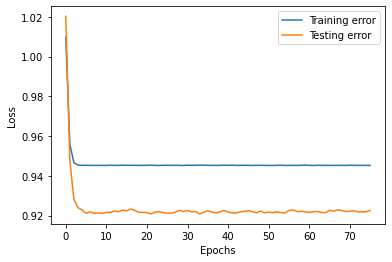

Model number  20 :


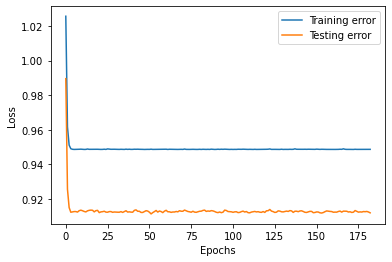

In [18]:
# Plotting training VS testing error for all 20 models for SGD
for x in range(20):
    
    plt.figure()
    print("Model number ",x+1,":")
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.plot(past_rmse_train_sgd[x], label="Training error")
    plt.plot(past_rmse_test_sgd[x], label="Testing error")
    plt.legend()
    plt.show()

In [19]:
#Now using 20th model to compare effect of learning rate on SGD

X_train = training_data_list[19][indep_attrs].to_numpy() 
Y_train = training_data_list[19][dep_attr].to_numpy()
    
X_test = testing_data_list[19][indep_attrs].to_numpy() 
Y_test = testing_data_list[19][dep_attr].to_numpy()

precision = 0.000001
eta2=0.01
eta3=0.1

final_theta2, past_costs_train2, past_costs_test2, past_rmse_train_sgd2, past_rmse_test_sgd2 = stoch_grad(X_train, Y_train, iterations, eta2, X_test, Y_test, precision)
final_theta3, past_costs_train3, past_costs_test3, past_rmse_train_sgd3, past_rmse_test_sgd3 = stoch_grad(X_train, Y_train, iterations, eta3, X_test, Y_test, precision)



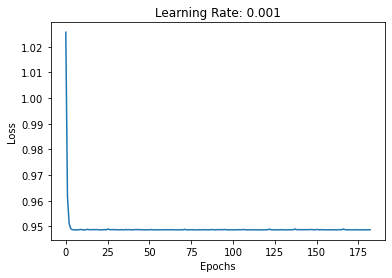

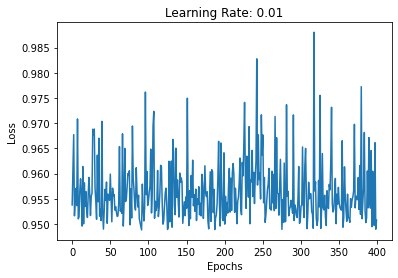

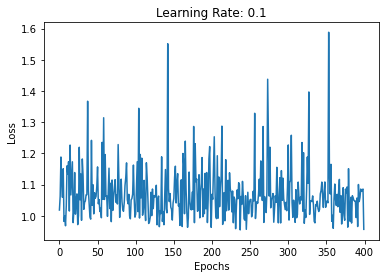

In [20]:
plt.figure()
plt.title('Learning Rate: 0.001')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.plot(past_rmse_train_sgd[19])
plt.figure()
plt.title('Learning Rate: 0.01')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.plot(past_rmse_train_sgd2)
plt.figure()
plt.title('Learning Rate: 0.1')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.plot(past_rmse_train_sgd3)

In [21]:
#Creating data frame to highlight min rmse across the models
min_rmse_train_table_gd=[None]*20
min_rmse_test_table_gd=[None]*20
min_rmse_train_table_sgd=[None]*20
min_rmse_test_table_sgd=[None]*20
for x in range(20):
    min_rmse_train_table_gd[x]=past_rmse_train_grad_desc[x][len(past_rmse_train_grad_desc[x])-1]
    min_rmse_test_table_gd[x]=past_rmse_test_grad_desc[x][len(past_rmse_test_grad_desc[x])-1]
    min_rmse_train_table_sgd[x]=past_rmse_train_sgd[x][len(past_rmse_train_sgd[x])-1]
    min_rmse_test_table_sgd[x]=past_rmse_test_sgd[x][len(past_rmse_test_sgd[x])-1]

df = pd.DataFrame(list(zip(training_err_norm , min_rmse_train_table_gd, min_rmse_train_table_sgd, testing_err_norm ,  min_rmse_test_table_gd, min_rmse_test_table_sgd)), 
     index =['1', '2', '3', '4','5','6','7','8','9','10','11','12','13','14','15','16','17','18','19','20'], columns =['NE train', 'GD train' , 'SGD train' , 'NE test', 'GD test' , 'SGD test']) 
df

,NE train,GD train,SGD train,NE test,GD test,SGD test
1,0.905017,0.905552,0.905037,1.014336,1.012209,1.014278
2,0.945165,0.945680,0.945243,0.920662,0.921175,0.921247
3,0.959181,0.959709,0.959232,0.887403,0.889654,0.887358
4,0.946807,0.947360,0.946845,0.919198,0.923199,0.918384
5,0.925863,0.926403,0.925899,0.964849,0.964992,0.964770
6,0.949876,0.950383,0.949891,0.909586,0.911952,0.909218
7,0.956373,0.956859,0.956396,0.893007,0.893803,0.893189
8,0.917572,0.918073,0.917658,0.984334,0.982641,0.985404
9,0.957215,0.957752,0.957298,0.892887,0.897487,0.891731
10,0.933645,0.934221,0.933654,0.949084,0.950359,0.948652


In [22]:
#Trying to compare the algorithms
wins_NE_train=0
wins_GD_train=0
wins_SGD_train=0
wins_NE_test=0
wins_GD_test=0
wins_SGD_test=0
for x in range(20):
    if(training_err_norm[x]<min(min_rmse_train_table_gd[x],min_rmse_train_table_sgd[x])):
        wins_NE_train+=1
    elif(min_rmse_train_table_gd[x]<min(training_err_norm[x],min_rmse_train_table_sgd[x])):
        wins_GD_train+=1
    else:
        wins_SGD_train+=1
            
    if(testing_err_norm[x]<min(min_rmse_test_table_gd[x],min_rmse_test_table_sgd[x])):
        wins_NE_test+=1
            
    elif(min_rmse_test_table_gd[x]<min(testing_err_norm[x],min_rmse_test_table_sgd[x])):
        wins_GD_test+=1
    else:
        wins_SGD_test+=1        

wins = {'Number of training minimums ':[wins_NE_train, wins_GD_train, wins_SGD_train], 'Number of testing minimums':[wins_NE_test, wins_GD_test, wins_SGD_test]}
df = pd.DataFrame(wins,index=['NE','GD','SGD'])
df

,Number of training minimums,Number of testing minimums
NE,20,6
GD,0,6
SGD,0,8


In [23]:
#Printing the training mean and variance as well as the testing mean and variance across the 3 algorithms
mean_NE_train=statistics.mean(training_err_norm)
variance_NE_train=statistics.variance(training_err_norm)
mean_GD_train=statistics.mean(min_rmse_train_table_gd)
variance_GD_train=statistics.variance(min_rmse_train_table_gd)
mean_SGD_train=statistics.mean(min_rmse_train_table_sgd)
variance_SGD_train=statistics.variance(min_rmse_train_table_sgd)

mean_NE_test=statistics.mean(testing_err_norm)
variance_NE_test=statistics.variance(testing_err_norm)
mean_GD_test=statistics.mean(min_rmse_test_table_gd)
variance_GD_test=statistics.variance(min_rmse_test_table_gd)
mean_SGD_test=statistics.mean(min_rmse_test_table_sgd)
variance_SGD_test=statistics.variance(min_rmse_test_table_sgd)

error_stats = {'Training mean error':[mean_NE_train, mean_GD_train, mean_SGD_train], 'Testing mean error':[mean_NE_test, mean_GD_test, mean_SGD_test]}
df = pd.DataFrame(error_stats,index=['NE','GD','SGD'])
display(df) 

error_stats = {'Training variance error':[variance_NE_train, variance_GD_train, variance_SGD_train], 'Testing variance error':[variance_NE_test, variance_GD_test, variance_SGD_test]}
df = pd.DataFrame(error_stats,index=['NE','GD','SGD'])
display(df) 

,Training mean error,Testing mean error
NE,0.940567,0.931703
GD,0.941088,0.932468
SGD,0.940618,0.931746


,Training variance error,Testing variance error
NE,0.000292,0.001659
GD,0.000291,0.001580
SGD,0.000292,0.001659
